#  <span style="color:#f7df47">CHEESE PRODUCTION</span>
<span style="color:#FFA600">**2024 Tidytuesday  Week 23** </span>

## Setup

### Libraries

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

In [4]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#rcParams['font.family'] = 'Roboto'

### Data

In [5]:
dat_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv'

#### Pandas

In [6]:
pdf = pd.read_csv(dat_url)
pdf.shape

(1187, 19)

#### Polars

In [7]:
ldf = pl.read_csv(dat_url)
ldf.shape

(1187, 19)

## EDA

### Overview

#### Pandas

In [12]:
pdf.head(2)

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN


In [18]:
#print(pdf.head(2))

In [14]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cheese           1187 non-null   object
 1   url              1187 non-null   object
 2   milk             1151 non-null   object
 3   country          1176 non-null   object
 4   region           855 non-null    object
 5   family           489 non-null    object
 6   type             1174 non-null   object
 7   fat_content      248 non-null    object
 8   calcium_content  25 non-null     object
 9   texture          1129 non-null   object
 10  rind             945 non-null    object
 11  color            1045 non-null   object
 12  flavor           1089 non-null   object
 13  aroma            929 non-null    object
 14  vegetarian       748 non-null    object
 15  vegan            748 non-null    object
 16  synonyms         294 non-null    object
 17  alt_spellings    109 non-null    

In [25]:
pdf.isna().sum()
pdf.isna().mean().round(2)

cheese             0.00
url                0.00
milk               0.03
country            0.01
region             0.28
family             0.59
type               0.01
fat_content        0.79
calcium_content    0.98
texture            0.05
rind               0.20
color              0.12
flavor             0.08
aroma              0.22
vegetarian         0.37
vegan              0.37
synonyms           0.75
alt_spellings      0.91
producers          0.34
dtype: float64

#### Polars

In [13]:
ldf.head(2)

cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Aarewasser""","""https://www.ch…","""cow""","""Switzerland""","""NA""","""NA""","""semi-soft""","""NA""","""NA""","""buttery""","""washed""","""yellow""","""sweet""","""buttery""","""FALSE""","""FALSE""","""NA""","""NA""","""Jumi"""
"""Abbaye de Bell…","""https://www.ch…","""sheep""","""France""","""Pays Basque""","""NA""","""semi-hard, art…","""NA""","""NA""","""creamy, dense,…","""natural""","""yellow""","""burnt caramel""","""lanoline""","""TRUE""","""FALSE""","""Abbaye Notre-D…","""NA""","""NA"""


In [16]:
print(ldf.head(2))

shape: (2, 19)
┌─────────────┬─────────────┬───────┬────────────┬───┬───────┬────────────┬────────────┬───────────┐
│ cheese      ┆ url         ┆ milk  ┆ country    ┆ … ┆ vegan ┆ synonyms   ┆ alt_spelli ┆ producers │
│ ---         ┆ ---         ┆ ---   ┆ ---        ┆   ┆ ---   ┆ ---        ┆ ngs        ┆ ---       │
│ str         ┆ str         ┆ str   ┆ str        ┆   ┆ str   ┆ str        ┆ ---        ┆ str       │
│             ┆             ┆       ┆            ┆   ┆       ┆            ┆ str        ┆           │
╞═════════════╪═════════════╪═══════╪════════════╪═══╪═══════╪════════════╪════════════╪═══════════╡
│ Aarewasser  ┆ https://www ┆ cow   ┆ Switzerlan ┆ … ┆ FALSE ┆ NA         ┆ NA         ┆ Jumi      │
│             ┆ .cheese.com ┆       ┆ d          ┆   ┆       ┆            ┆            ┆           │
│             ┆ /aarewasse… ┆       ┆            ┆   ┆       ┆            ┆            ┆           │
│ Abbaye de   ┆ https://www ┆ sheep ┆ France     ┆ … ┆ FALSE ┆ Abbaye     ┆ 

In [21]:
ldf.schema

OrderedDict([('cheese', String),
             ('url', String),
             ('milk', String),
             ('country', String),
             ('region', String),
             ('family', String),
             ('type', String),
             ('fat_content', String),
             ('calcium_content', String),
             ('texture', String),
             ('rind', String),
             ('color', String),
             ('flavor', String),
             ('aroma', String),
             ('vegetarian', String),
             ('vegan', String),
             ('synonyms', String),
             ('alt_spellings', String),
             ('producers', String)])

In [22]:
ldf.null_count()

cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,36,11,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0


### Select / Rename

####  Pandas

In [8]:
spdf = pdf.loc[:, ['cheese', 'milk', 'country', 'type', 'texture', 'color', 'flavor', 'producers']]
spdf.rename(columns={'producers':'company'}, inplace=True)
spdf.head(2)

,cheese,milk,country,type,texture,color,flavor,company
0,Aarewasser,cow,Switzerland,semi-soft,buttery,yellow,sweet,Jumi
1,Abbaye de Belloc,sheep,France,"semi-hard, artisan","creamy, dense, firm",yellow,burnt caramel,NaN


#### Polars

In [9]:
ldf.select(pl.col('producers').alias('company'))
ldf.select(pl.col('cheese', 'milk', 'country', 'type', 'texture', 'color', 'flavor', 'producers'));

In [10]:
sldf = (ldf
        .select(['cheese', 'milk', 'country', 'type', 'texture', 'color', 'flavor', 'producers'])
        .rename({'producers':'company'})
)
sldf.head(2)

cheese,milk,country,type,texture,color,flavor,company
str,str,str,str,str,str,str,str
"""Aarewasser""","""cow""","""Switzerland""","""semi-soft""","""buttery""","""yellow""","""sweet""","""Jumi"""
"""Abbaye de Bell…","""sheep""","""France""","""semi-hard, art…","""creamy, dense,…","""yellow""","""burnt caramel""","""NA"""


### Filter / drop NaN

#### Pandas

*Filter out rows with`NULL` values*

In [11]:
clean_spdf = spdf.dropna()

In [12]:
clean_spdf.isnull().sum()

cheese     0
milk       0
country    0
type       0
texture    0
color      0
flavor     0
company    0
dtype: int64

*Subset `United States` rows and drop `country` column*

In [13]:
uspd = clean_spdf[clean_spdf.loc[:, 'country'] == 'United States']
uspd = uspd.drop('country', axis=1)
nuspd = clean_spdf[clean_spdf.loc[:, 'country'] != 'United States']

#### Polars

*Filter out rows with`NULL` values*

In [14]:
sldf.select(pl.col('*').drop_nans());

In [15]:
clean_sldf = sldf.drop_nulls()

In [16]:
clean_sldf.null_count()

cheese,milk,country,type,texture,color,flavor,company
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


*Subset `United States` rows and drop `country` column*

In [17]:
uspl = clean_sldf.filter(pl.col("country") == 'United States').drop('country')
nuspl = clean_sldf.filter(pl.col("country") != 'United States')

## Analysis

### By country

In [18]:
nuspd.value_counts('country')

country
Italy                                      83
Canada                                     55
Australia                                  42
France                                     32
Ireland                                    29
England                                    25
England, Great Britain, United Kingdom     23
Scotland                                   19
United Kingdom                             16
Germany                                    16
Netherlands                                13
Austria                                    13
Canada, Italy                              10
Switzerland                                 7
England, United Kingdom                     5
New Zealand                                 4
India                                       4
Sweden                                      3
Scotland, United Kingdom                    2
Mexico and Caribbean                        2
Wales                                       2
Croatia                   

column `country` has mixed entries: 
- England, United Kingdom
- Scotland, United Kingdom
- Great Britain, United Kingdom, Wales
- Great Britain, Scotland, United Kingdom
- England, Scotland, United Kingdom
- Mexico and Caribbean
-...

 - `country` column into separate rows
 - filter out: United Kingdom - Great Britain - Caribbean

#### Pandas

In [19]:
country_pdf = nuspd.loc[:, ['cheese', 'country']]
type(country_pdf['country'])

pandas.core.series.Series

In [20]:
country_pdf['country_list'] = country_pdf['country'].str.split(', ')
country_pdf.head(6)

,cheese,country,country_list
0,Aarewasser,Switzerland,[Switzerland]
5,Abbaye de Timadeuc,France,[France]
6,Abbaye du Mont des Cats,France,[France]
7,Abbot’s Gold,"England, Great Britain, United Kingdom","[England, Great Britain, United Kingdom]"
11,Accasciato,Italy,[Italy]
15,ADL Brick Cheese,Canada,[Canada]


In [21]:
country_pdf2 = (
    country_pdf
    .explode('country_list')
    .reset_index()
    .drop(['index','country'], axis = 1)
    .rename(columns={'country_list':'country'})
)

country_pdf2['country_list'] = country_pdf2['country'].str.split(' and ')

In [22]:
country_pdf3 = (
    country_pdf2
    .explode('country_list')
    .reset_index()
    .drop(['index','country'], axis = 1)
    .rename(columns={'country_list':'country'})
)

In [23]:
country_pdf3.shape  # 423 => 498 => 500

(500, 2)

 - Combine: Great Britain, Wales, Scotland and England => United Kingdom

In [24]:
country_pdf3['country_2'] = np.where(
    country_pdf3['country'] == 'Great Britain', 'United Kingdom', np.where(
        country_pdf3['country'] == 'Wales', 'United Kingdom', np.where(
            country_pdf3['country'] == 'Scotland', 'United Kingdom', np.where(
                country_pdf3['country'] == 'England', 'United Kingdom', country_pdf3['country']
            )
        )
    )
)
cpdf = country_pdf3.drop('country', axis = 1).rename(columns = {'country_2' : 'country'})
cpdf.head()

,cheese,country
0,Aarewasser,Switzerland
1,Abbaye de Timadeuc,France
2,Abbaye du Mont des Cats,France
3,Abbot’s Gold,United Kingdom
4,Abbot’s Gold,United Kingdom


In [25]:
country_pdf3.value_counts('country')

country
Italy             93
Canada            66
England           54
United Kingdom    49
Australia         42
France            35
Ireland           29
Great Britain     25
Scotland          23
Germany           16
Netherlands       14
Austria           13
Switzerland        8
India              4
New Zealand        4
Mexico             3
Sweden             3
Wales              3
Caribbean          2
Croatia            2
United States      2
Mauritania         1
Egypt              1
Middle East        1
Lebanon            1
Chile              1
Spain              1
Finland            1
Syria              1
Belgium            1
Denmark            1
Name: count, dtype: int64

In [26]:
cpdf.value_counts('country')  # doubling counting United Kingdom ???!!!

country
United Kingdom    154
Italy              93
Canada             66
Australia          42
France             35
Ireland            29
Germany            16
Netherlands        14
Austria            13
Switzerland         8
New Zealand         4
India               4
Mexico              3
Sweden              3
Croatia             2
United States       2
Caribbean           2
Denmark             1
Lebanon             1
Middle East         1
Chile               1
Spain               1
Finland             1
Egypt               1
Syria               1
Belgium             1
Mauritania          1
Name: count, dtype: int64

In [27]:
# droping: United Kingdom and Great Britain
final_country_df = country_pdf3[~country_pdf3.country.isin(['United Kingdom', 'Great Britain'])]
country_df_top10 = final_country_df.value_counts('country').head(10).sort_values()

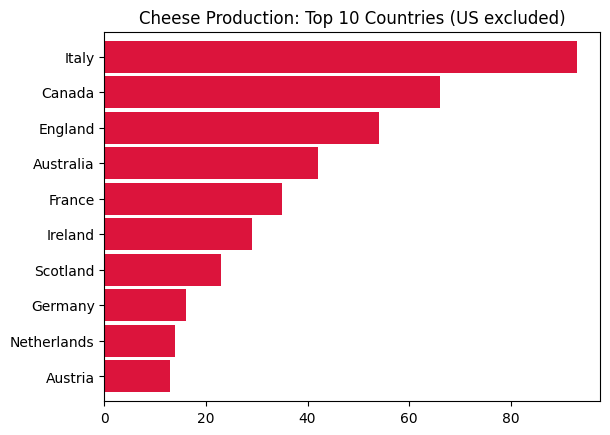

In [28]:
country_df_top10.plot(kind='barh', 
                      color = 'crimson',
                      width = .9,
                      title= "Cheese Production: Top 10 Countries (US excluded)",
                      ylabel="")
plt.show()

#### Polars

In [29]:
nuspl.select(pl.col('country').n_unique().alias('total'))

country_ldf = nuspl.select(pl.col(['cheese', 'country']))
country_ldf.head(2)

cheese,country
str,str
"""Aarewasser""","""Switzerland"""
"""Abbaye de Bell…","""France"""


In [30]:
(country_ldf
 .group_by(
    'country', 
    maintain_order=True
    ).agg(pl.col("*").count().alias("count"))
    .sort('count', descending=True)
);

In [31]:
country_ldf2 = (country_ldf
 .with_columns(pl.col('country').str.split(by=', ').alias('country_2'))
 .explode('country_2')
)

In [32]:
country_ldf3 = (country_ldf2
 .group_by('country_2')  # maintain_order=True, otherwise random order !!
 .agg(pl.col('cheese').count().alias('total'))
 .sort('total', descending=True)
)

In [33]:
final_country_ldf = (country_ldf3
                     .filter(~pl.col('country_2')
                             .is_in(['United Kingdom', 'Great Britain']))
                             .sort('total', descending=True)
                             )
final_country_ldf_top10 = final_country_ldf.head(10)

In [34]:
print(final_country_ldf_top10)

shape: (10, 2)
┌─────────────┬───────┐
│ country_2   ┆ total │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ France      ┆ 161   │
│ Italy       ┆ 150   │
│ England     ┆ 81    │
│ Canada      ┆ 70    │
│ …           ┆ …     │
│ Scotland    ┆ 30    │
│ Germany     ┆ 27    │
│ Netherlands ┆ 24    │
│ Spain       ┆ 23    │
└─────────────┴───────┘


In [35]:
#Built-in plotting with hvPlot
final_country_ldf_top10.plot.bar(
    x='country_2',
    y='total',
    width=650,
    color = 'crimson',
    xlabel = '',
    title = "Cheese Production: Top 10 Countries (US excluded)"
)

:Bars   [country_2]   (total)

In [36]:
final_country_ldf_top10_reversed = final_country_ldf_top10.sort('total', descending=False)
#Built-in plotting with hvPlot
final_country_ldf_top10_reversed.plot.barh(
    x='country_2',
    y='total',
    width=650,
    color = 'crimson',
    xlabel = '',
    title = "Cheese Production: Top 10 Countries (US excluded)"
)

:Bars   [country_2]   (total)

### By colors

#### Pandas

In [37]:
color_df = clean_spdf.loc[:, ['cheese', 'color']]
color_df.head(2)

,cheese,color
0,Aarewasser,yellow
5,Abbaye de Timadeuc,pale yellow


Combine colors:
 - pale white => white
 - golden yellow, pale yellow => yellow
 - brownish yellow => brown
 - golden orange => orange
 - pink and white => pink
 - blue-grey => blue


In [38]:
color_df['color2'] = np.where(
    color_df.color == 'pale white', 'white', np.where(
        color_df.color == 'pale yellow', 'yellow', np.where(
            color_df.color == 'brownish yellow', 'brown', np.where(
                color_df.color == 'golden yellow', 'yellow', np.where(
                    color_df.color == 'pink and white', 'pink', np.where(
                        color_df.color == 'blue-grey', 'blue', np.where(
                            color_df.color == 'golden orange', 'orange', color_df.color
                        )
                    )
                )
            )
        )
    )
)

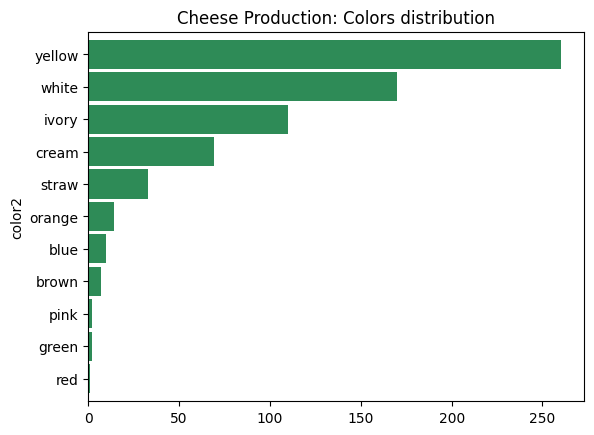

In [39]:
color_df.color2.value_counts().sort_values().plot(
    kind = 'barh', 
    color = 'seagreen',
    width = .9,
    title = "Cheese Production: Colors distribution")
plt.show()

#### Polars

In [40]:
colors_ldf = clean_sldf.select(pl.col(['cheese', 'color']))

In [41]:
colors_ldf = colors_ldf.with_columns(
    pl.when(pl.col('color') == 'pale white').then(pl.lit('white'))
    .when(pl.col('color') == 'pale yellow').then(pl.lit('yellow'))
    .when(pl.col('color') == 'brownish yellow').then(pl.lit('brown'))
    .when(pl.col('color') == 'golden yellow').then(pl.lit('yellow'))
    .when(pl.col('color') == 'golden orange').then(pl.lit('orange'))
    .when(pl.col('color') == 'blue-grey').then(pl.lit('blue'))
    .when(pl.col('color') == 'pink and white').then(pl.lit('pink'))
    .otherwise(pl.col('color'))
    .alias('color')
)

In [42]:
colors_combined = (colors_ldf
    .group_by('color')
    .agg(pl.col('cheese').count().alias('total'))
    .sort('total', descending=False)
    .filter(pl.col('color') != 'NA')
)

In [43]:
colors_combined.plot.barh(
    x='color',
    y='total',
    color = 'seagreen',
    width=650,
    xlabel = '',
    title = "Cheese Production: Colors distribution")

:Bars   [color]   (total)